In [119]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *
import pandas as pd
import os
import ndjson
import chess.pgn
import seaborn as sns
import matplotlib.pyplot as plt
import math

def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [136]:
white_elo = []
black_elo = []
pgn_file = open("data/data_openings.pgn")
game = chess.pgn.read_game(pgn_file)

count = 0
while game is not None:
    # Read the next game

    try:
        white_elo.append(int(game.headers.get('WhiteElo', '')))
        black_elo.append(int(game.headers.get('BlackElo', '')))
    except Exception as e:
        print(e)
        print(game.headers.get('WhiteElo', ''))
        white_elo.append(-999)
        black_elo.append(-999)
    game = chess.pgn.read_game(pgn_file)
    
pgn_file.close()

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with base 10: ''

invalid literal for int() with b

In [139]:
# Specify the directory containing the NDJSON files
folder_path = 'data/raw'

# Initialize an empty list to store data from all files
data_list = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.ndjson'):
        file_path = os.path.join(folder_path, file_name)
        
        # Open and read the NDJSON file
        with open(file_path, 'r') as f:
            reader = ndjson.reader(f)
            data_list.extend(reader)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data_list)

# Display the DataFrame
df.head(2)


,event,round,white,black,result,moves,white_elo,black_elo,ECO,Opening,...,end_q,end_N,end_P,end_Q,end_B,end_R,end_K,promotion,can_claim_draw,insufficient_material
0,1,??,??,??,1/2-1/2,"[g1f3, g8f6, c2c4, c7c5, b2b3, g7g6, c1b2, f8g7, e2e3, e8g8, f1e2, b7b6, e1g1, c8b7, b1c3, b8c6, d1c2, a8c8, a1c1, d7d5, c3d5, f6d5, b2g7, d5f4, e3f4, g8g7, c2c3, g7g8, c1d1, d8d6, d2d4, c5d4, f3d4, d6f4, e2f3, f4f6, d4b5, f6c3]",,,A15,English opening,...,1.0,1.0,6.0,1.0,1.0,2.0,1,NaN,NaN,NaN
1,2,??,??,??,1/2-1/2,"[e2e4, e7e5, g1f3, g8f6, d2d4, f6e4, f3e5, d7d6, e5f3, d6d5, f1d3, e4d6, e1g1]",,,C42,Petrov,...,1.0,2.0,7.0,1.0,2.0,2.0,1,NaN,NaN,NaN


In [140]:
df['white_elo'] = white_elo
df['black_elo'] = black_elo

In [141]:
df = df.fillna(0)
print(len(df))
df = df[df['white_cpl'].apply(lambda x: len(x) > 0)]
df = df[df['black_cpl'].apply(lambda x: len(x) > 0)]
print(len(df))
df = df[df['white_elo'] != -999]
df = df[df['black_elo'] != -999]
print(len(df))

50000
49923
24965


In [142]:
df["ECO"] = df["ECO"].astype('category')
df["Opening"] = df["Opening"].astype('category')
df["result"] = df["result"].astype('category')

df["mean_elos"] = df[['white_elo', 'black_elo']].mean(axis=1)
df["diff_elos"] = df['white_elo'] - df['black_elo']

df['white_mean'] = df['white_cpl'].apply(np.mean)
df['white_std'] = df['white_cpl'].apply(np.std)
df['white_min'] = df['white_cpl'].apply(np.min)
df['white_max'] = df['white_cpl'].apply(np.max)

df['black_mean'] = df['black_cpl'].apply(np.mean)
df['black_std'] = df['black_cpl'].apply(np.std)
df['black_min'] = df['black_cpl'].apply(np.min)
df['black_max'] = df['black_cpl'].apply(np.max)

df['stockfish_mean'] = df['stockfish_eval'].apply(np.mean)
df['stockfish_std'] = df['stockfish_eval'].apply(np.std)
df['stockfish_min'] = df['stockfish_eval'].apply(np.min)
df['stockfish_max'] = df['stockfish_eval'].apply(np.max)

In [143]:
cols = df.columns.tolist()

to_remove = ["moves", "white_elo", "black_elo", "Opening", "white_cpl", "black_cpl", "diff_elos", "stockfish_eval", "white", "black", "event"]

dep_var = "mean_elos"

In [144]:
df_dropped = df.drop(columns=to_remove)

In [308]:
#df["mean_elos"] = np.log(df["mean_elos"])

In [145]:
cont_nn,cat_nn = cont_cat_split(df_dropped, dep_var=dep_var)

In [91]:
#df_dropped = df_dropped.applymap(lambda x: str(x) if isinstance(x, (list, dict)) else x)

C:\Users\jonat\AppData\Local\Temp\ipykernel_20844\2619507440.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_dropped = df_dropped.applymap(lambda x: str(x) if isinstance(x, (list, dict)) else x)


In [146]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df_dropped))

In [147]:
#['queen_moved_at', 'total_checks', 'first_check_at', 'queen_changed_at', 'total_moves', 'end_r', 'end_p', 'end_b', 'end_n', 'end_q', 'end_N', 'end_P', 'end_Q', 'end_B', 'end_R', 'promotion', 'can_claim_draw', 'insufficient_material', 'white_mean', 'white_std', 'white_min', 'white_max', 'black_mean', 'black_std', 'black_min', 'black_max', 'stockfish_mean', 'stockfish_std', 'stockfish_min', 'stockfish_max']

to = TabularPandas(df_dropped, procs=[Categorify, FillMissing, Normalize],
                   cont_names = cont_nn,
                   cat_names = cat_nn,
                   y_names='mean_elos',
                   splits=splits)


In [148]:
dls = to.dataloaders(1024)

This is the min and max of the mean elo ratings

In [149]:
y = to.train.y
y.min(),y.max()

(1216.5, 2840.5)

In [155]:
learn = tabular_learner(dls, y_range=(8,12), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)


"""By default, for tabular data fastai creates a neural network with two hidden layers, with 200 and 100 activations, respectively. 
This works quite well for small datasets, but here we've got quite a large dataset, so we increase the layer sizes to 500 and 250:"""

"By default, for tabular data fastai creates a neural network with two hidden layers, with 200 and 100 activations, respectively. \nThis works quite well for small datasets, but here we've got quite a large dataset, so we increase the layer sizes to 500 and 250:"

SuggestedLRs(valley=0.12022644281387329)

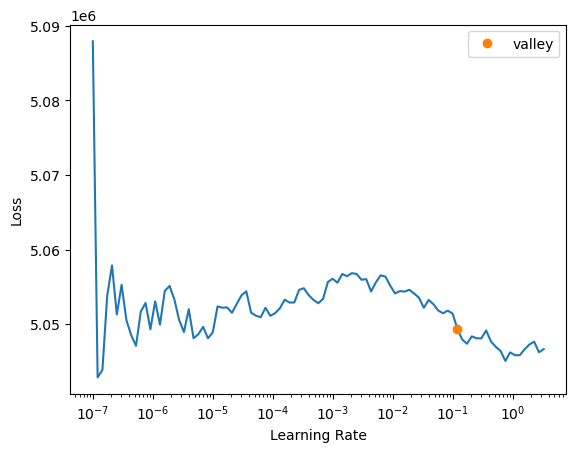

In [156]:
learn.lr_find()

In [157]:
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,time
0,5049632.500000,5039106.500000,00:00
1,5044696.000000,5033999.500000,00:00
2,5049866.500000,5032572.000000,00:00
3,5046897.500000,5032342.000000,00:00
4,5042991.500000,5032361.500000,00:00


In [158]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

2243.292558

In [154]:
(preds)

tensor([[11.7220],
        [11.7861],
        [ 8.0000],
        ...,
        [ 8.0000],
        [11.7751],
        [11.7807]])

In [159]:
# Define the file path where you want to save the NDJSON file
ndjson_file_path = 'data/curated/all.ndjson'

# Open the file and write each row as a JSON object
with open(ndjson_file_path, 'w') as f:
    for record in df.to_dict(orient='records'):
        json.dump(record, f)
        f.write('\n')  # Write a newline after each JSON object

print(f"DataFrame saved to {ndjson_file_path}")

DataFrame saved to data/curated/all.ndjson
